Text(0.5,0.98,'Have you had food poisoning in the last year?')

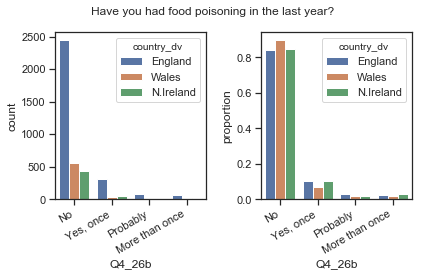

In [16]:
#Plot country specific questions for 'have you had food poisoning in the lat year'
#question of Food and You survey

#Charlie Jeynes code adapted for this question

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")  
%matplotlib inline

path="/Users/jamesdoherty/Documents/Career/Pivigo/Data/Food-and-you/"
plotdir="/Users/jamesdoherty/Documents/Career/Pivigo/Data/Food-and-you/"

pd.set_option('display.max_rows', None)

# import data
df = pd.read_csv(path+'Food+and+You+Waves+1-5+Data (3).csv')

# select the columns interested in within the dataframe
df_select = df[['Q4_26b', 'country_dv', 'surveyyear']]

# replace  - 'refused:-9', 'don't knows:-8', 'not applicable:5' 
# - into not applicable: -1 numbers
df_select = df_select.replace([-9, -8, -1, 98], np.nan)

#print(df_select)

# use seaborn barplot for proportions of responses per group
x, y, hue = "Q4_26b", "proportion", "country_dv"
prop_df = (df_select[x]
           .groupby(df_select[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
#sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

# key to country
country = { 1:'England', 
            2: 'Wales',
            3: 'N.Ireland'
          }

# key to answers
ans = {  #-1 :'Not applicable'
         1 :'More than once'
        ,2 :'Yes, once'
        ,3 :'Probably'
        ,4 :'No'
       }
# replace country keys with real names in the created df
df_select = df_select.replace({"country_dv": country})
prop_df = prop_df.replace({"country_dv": country})

# replace answers keys with real answers in the created df
df_select = df_select.replace({"Q4_26b": ans})
prop_df = prop_df.replace({"Q4_26b": ans})

# create a figure subplot and  use seaborn's countplot and barplot
f, axes = plt.subplots(1, 2)
hue_order = ['England', 'Wales', 'N.Ireland']
sns.countplot(x=x, hue=hue, hue_order=hue_order, data=df_select, ax=axes[0])
sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
f.autofmt_xdate()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
f.suptitle('Have you had food poisoning in the last year?')